<a href="https://colab.research.google.com/github/LGN2/Ai/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This code is to access my drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed my drive will show in the side and i can get my files

Mounted at /content/drive


In [2]:
# Defining paths to my dataset
train_dir = '/content/drive/MyDrive/glassesnoglasses/train'  # this is the train dataset
test_dir = '/content/drive/MyDrive/glassesnoglasses/test'    # this is the test dataset

In [3]:
# this is to import spicific folders from test and train
import os
print(len(os.listdir('/content/drive/MyDrive/glassesnoglasses/train/glasses')))
print(len(os.listdir('/content/drive/MyDrive/glassesnoglasses/train/noglasses')))
print(len(os.listdir('/content/drive/MyDrive/glassesnoglasses/test/glasses')))
print(len(os.listdir('/content/drive/MyDrive/glassesnoglasses/test/noglasses')))

2040
2040
1036
1068


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (glasses vs. noglasses)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 3264 images belonging to 2 classes.
Found 816 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [10]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 528s 5s/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 2.4147e-05
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 544s 5s/step - accuracy: 1.0000 - loss: 3.1946e-04 - val_accuracy: 1.0000 - val_loss: 3.3845e-05
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 555s 5s/step - accuracy: 0.9968 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 8.1212e-05
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 568s 5s/step - accuracy: 0.9980 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 3.0428e-04
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 502s 5s/step - accuracy: 0.9981 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 9.7401e-04


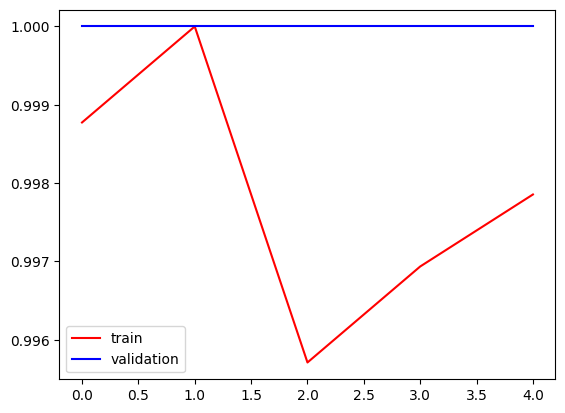

In [11]:
import matplotlib.pyplot as plt
#this is for the accuracy graph
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

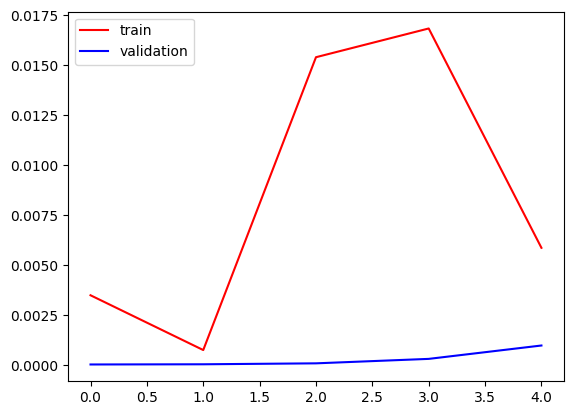

In [12]:
#this is for loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 2104 images belonging to 2 classes.


In [14]:
#predict the test data
predictions = model.predict(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[338 698]
 [360 708]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.33      0.39      1036
           1       0.50      0.66      0.57      1068

    accuracy                           0.50      2104
   macro avg       0.49      0.49      0.48      2104
weighted avg       0.49      0.50      0.48      2104



In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 793s 8s/step - accuracy: 0.9209 - loss: 1.3845 - val_accuracy: 0.5000 - val_loss: 31.0338
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 782s 8s/step - accuracy: 0.9937 - loss: 0.1310 - val_accuracy: 0.5000 - val_loss: 42.2294
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 809s 8s/step - accuracy: 0.9975 - loss: 0.0601 - val_accuracy: 0.5527 - val_loss: 12.3120
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 794s 8s/step - accuracy: 0.9895 - loss: 0.2393 - val_accuracy: 0.8554 - val_loss: 4.5955
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 776s 8s/step - accuracy: 0.9973 - loss: 0.0742 - val_accuracy: 0.9877 - val_loss: 0.1298


In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 2104 images belonging to 2 classes.


In [20]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[392 644]
 [396 672]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43      1036
           1       0.51      0.63      0.56      1068

    accuracy                           0.51      2104
   macro avg       0.50      0.50      0.50      2104
weighted avg       0.50      0.51      0.50      2104



In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = resnet_model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 949s 9s/step - accuracy: 0.6336 - loss: 1.7043 - val_accuracy: 0.9583 - val_loss: 0.2519
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 965s 9s/step - accuracy: 0.8730 - loss: 0.3065 - val_accuracy: 0.9559 - val_loss: 0.1700
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 925s 9s/step - accuracy: 0.9121 - loss: 0.2258 - val_accuracy: 0.9498 - val_loss: 0.1459
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 928s 9s/step - accuracy: 0.9572 - loss: 0.1422 - val_accuracy: 0.9620 - val_loss: 0.1213
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 944s 9s/step - accuracy: 0.9447 - loss: 0.1593 - val_accuracy: 0.9743 - val_loss: 0.1070


In [25]:
predictions = resnet_model.predict(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 487s 7s/step


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[362 674]
 [352 716]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.35      0.41      1036
           1       0.52      0.67      0.58      1068

    accuracy                           0.51      2104
   macro avg       0.51      0.51      0.50      2104
weighted avg       0.51      0.51      0.50      2104

